<a href="https://colab.research.google.com/github/Esoujanya/Hexart.In---AI-Center/blob/main/stress_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stress Detection with Machine Learning. Based on live human vitals, predict the stress levels of humans**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data Sets/SaYoPillow.csv")
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
data.shape

(630, 9)

In [ ]:
data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


**checking for null values**

In [ ]:
data.isnull().any()

snoring_rate        False
respiration_rate    False
body_temperature    False
limb_movement       False
blood_oxygen        False
eye_movement        False
sleeping_hours      False
heart_rate          False
stress_level        False
dtype: bool

**Splitting the dataset into train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(data.iloc[:, :8], data['stress_level'], \
                                                  test_size=0.2, random_state=8)
X_train.shape, X_test.shape

((504, 8), (126, 8))

**Performing encoding on labels and converting them into binary**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes=5
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
y_train[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

**Multi layer perceptron implementation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model=Sequential()
model.add(Dense(125, activation="relu"))
model.add(Dense(125, activation="relu"))
model.add(Dense(5, "softmax"))

In [ ]:
epochs=10
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
stats=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 1s 21ms/step - loss: 3.6313 - accuracy: 0.3002 - val_loss: 0.8328 - val_accuracy: 0.6139
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.9815 - accuracy: 0.5881 - val_loss: 0.8664 - val_accuracy: 0.3960
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5943 - accuracy: 0.7618 - val_loss: 0.4419 - val_accuracy: 0.9109
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4895 - accuracy: 0.7692 - val_loss: 0.6815 - val_accuracy: 0.5842
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4881 - accuracy: 0.7767 - val_loss: 0.3454 - val_accuracy: 0.9406
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2905 - accuracy: 0.9702 - val_loss: 0.3242 - val_accuracy: 0.8911
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.9752 - val_loss: 0.2550 - val_accuracy: 0.9505
Epoch 8/10
13/13 [=

**Visualzing training results**

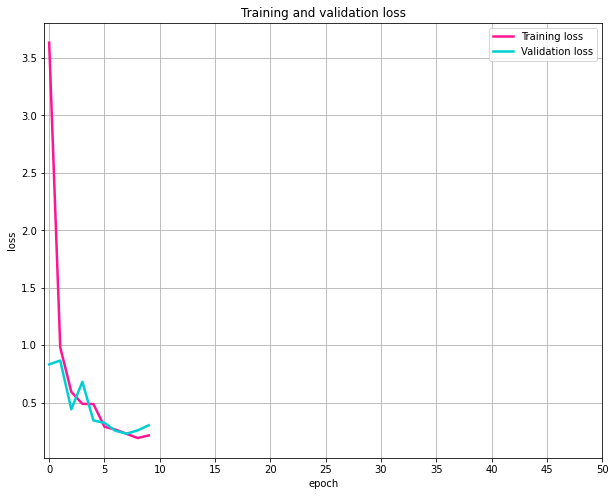

In [ ]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sb.lineplot(y='loss', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training loss")
sb.lineplot(y='val_loss', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, label="Validation loss")
plot.grid()
plot.legend()
plot.title("Training and validation loss")
plot.xticks(range(0, 51, 5));

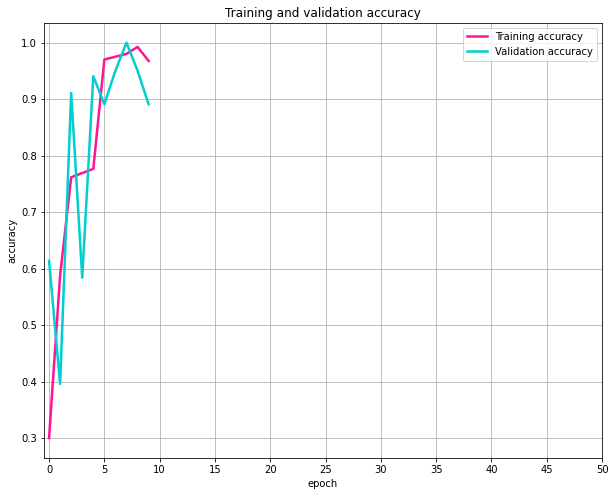

In [ ]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sb.lineplot(y='accuracy', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training accuracy")
sb.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, \
            label="Validation accuracy")
plot.grid()
plot.legend()
plot.title("Training and validation accuracy")
plot.xticks(range(0, 51, 5));

In [ ]:
_, accuracy=model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.9444
